# Classificação de inadimplência no empréstimo de automóveis

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## Carregando os dados

In [1]:
import pandas as pd

In [2]:
df_clientes = pd.read_csv("data/emp_automovel.csv")
df_clientes.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [3]:
import plotly.express as px

# Count occurrences of 0 and 1
counts = df_clientes['inadimplente'].value_counts()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Inadimplente': counts.index, 'Count': counts.values})
plot_data.replace({0:"Adimplência", 1: "Inadimplência"}, inplace=True)

fig = px.bar(plot_data, x='Inadimplente', y='Count', 
             color='Inadimplente',
             title='Comparação de contagem entre as classes',
             labels={'Inadimplente': 'Classes', 'Count': 'Número de ocorrências'})

fig.show()

## Separando os dados em Treino, Validação e Teste

![Separação de dados em treino, teste e validação](https://cdn3.gnarususercontent.com.br/3069-classificacao/Imagens/Aula1-img2.png)

In [4]:
x = df_clientes.drop(columns="inadimplente")
y = df_clientes["inadimplente"]

In [5]:
from sklearn.model_selection import train_test_split

SEED = 5

x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=SEED)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=SEED)

## Aplicar o modelo DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10, random_state=SEED)
decision_tree.fit(x_treino, y_treino)
print(f'Acurácia de treino: {decision_tree.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {decision_tree.score(x_val, y_val)}')

Acurácia de treino: 0.9206445993031359
Acurácia de validação: 0.905496036930581


### Matriz de Confusão

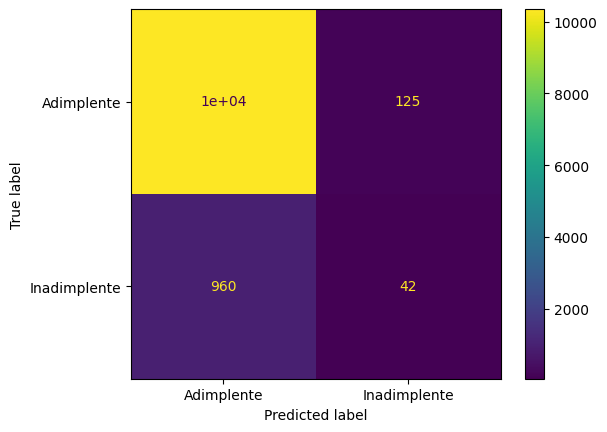

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predict = decision_tree.predict(x_val)

visualizacao = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_predict), display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot()

In [8]:
import plotly.graph_objects as go

def plotly_confusion_matrix(confusion_matrix, model):
    confusion_matrix = confusion_matrix[::-1]
    title_text = f"Matriz de Confusão<br><sup style='color: blue;'>Modelo: {model}</sup>"
    classes = ["Adimplente", "Inadimplente"]
    fig = go.Figure(
        go.Heatmap(
            z=confusion_matrix,
            x=classes,
            y=classes[::-1],
            text=confusion_matrix,
            texttemplate="%{text}"

        )
    )
    fig.update_layout(
        title=title_text,
        xaxis_title='Previstos',
        yaxis_title='Verdadeiros'
    )

    fig.show()

plotly_confusion_matrix(confusion_matrix(y_val, y_predict), "Árvode de Decisão")

## Modelo RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=10, random_state=SEED)
random_forest.fit(x_treino, y_treino)
print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {random_forest.score(x_val, y_val)}')

Acurácia de treino: 0.9153890824622531
Acurácia de validação: 0.9129866736347008


### Matriz de Confusão

In [10]:
y_predict = random_forest.predict(x_val)

plotly_confusion_matrix(confusion_matrix(y_val, y_predict), "Random Forest")

## Acurácia, Precisão, Recall, F1-Score
DecisionTreeClassifier

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

y_predict = decision_tree.predict(x_val)

print(f"Acurácia: {accuracy_score(y_val, y_predict)}")
print(f"Precisão: {precision_score(y_val, y_predict)}")
print(f"Recall: {recall_score(y_val, y_predict)}")
print(f"F1-Score: {f1_score(y_val, y_predict)}")

Acurácia: 0.905496036930581
Precisão: 0.25149700598802394
Recall: 0.041916167664670656
F1-Score: 0.0718562874251497


## ROC e AUC

AUC: 0.5149937742608114


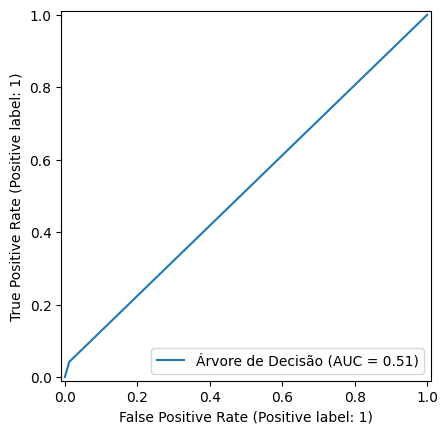

In [12]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_predictions(y_val, y_predict, name = 'Árvore de Decisão')
print(f"AUC: {roc_auc_score(y_val, y_predict)}")

## Precisão x Recall e AP

AP: 0.09415820039056431


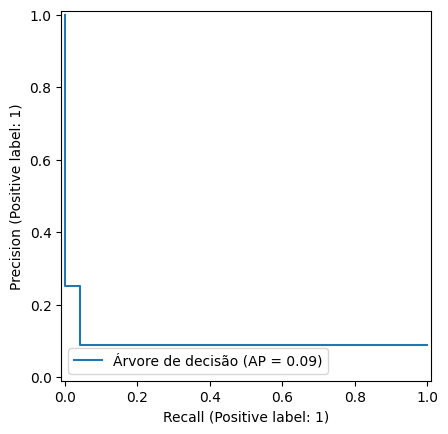

In [13]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_predictions(y_val, y_predict, name = 'Árvore de decisão')
print(f"AP: {average_precision_score(y_val, y_predict)}")

## Relatório de Métricas

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## Validação Cruzada

In [15]:
from sklearn.model_selection import KFold, cross_validate

decision_tree = DecisionTreeClassifier(max_depth=10)
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
cv_results = cross_validate(decision_tree, x, y, cv=kfold)
cv_results

{'fit_time': array([0.13692784, 0.12247014, 0.12195921, 0.12348986, 0.12213111]),
 'score_time': array([0.00176525, 0.00147986, 0.00149989, 0.00158   , 0.00160098]),
 'test_score': array([0.91333696, 0.90788328, 0.90755662, 0.91310976, 0.89928136])}

In [22]:
mean = cv_results["test_score"].mean()
std = cv_results["test_score"].std()
print(f"Acurácia média: {mean:.2f}%")
print(f'Intervalo de confiança: [{(mean - 2*std):.2f}%, {min(mean + 2*std, 1):.2f}%]')

Acurácia média: 0.91%
Intervalo de confiança: [0.90%, 0.92%]


## Validação cruzada com Recall

In [29]:
def confidence_interval(cv_results):
    mean = cv_results["test_score"].mean()
    std = cv_results["test_score"].std()
    print(f'Intervalo de confiança: [{(mean - 2*std):.2f}, {min(mean + 2*std, 1):.2f}]')

cv_results = cross_validate(decision_tree, x, y, cv=kfold, scoring="recall")
confidence_interval(cv_results)

Intervalo de confiança: [0.01, 0.03]


In [25]:
cv_results = cross_validate(decision_tree, x, y, cv=kfold, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.14885712, 0.12269497, 0.12125802, 0.12167096, 0.12148499]),
 'score_time': array([0.00911212, 0.00872898, 0.00873375, 0.00895476, 0.00901985]),
 'test_accuracy': array([0.91301034, 0.90744774, 0.90799216, 0.91365418, 0.89949913]),
 'test_precision': array([0.25581395, 0.20833333, 0.25757576, 0.24528302, 0.21      ]),
 'test_recall': array([0.02906209, 0.01856436, 0.02091021, 0.01697128, 0.02427746]),
 'test_f1': array([0.05219454, 0.03409091, 0.03868032, 0.03174603, 0.04352332]),
 'test_roc_auc': array([0.64526522, 0.6565088 , 0.63663407, 0.6501953 , 0.63277329])}

## Estratificando os dados

In [26]:
df_clientes["inadimplente"].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [27]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
cv_results = cross_validate(decision_tree, x, y, cv=stratified_kfold, scoring="recall")
confidence_interval(cv_results)

Intervalo de confiança: [0.02%, 0.04%]


## Balanceando os dados

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
y_balanced.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [30]:
cv_results = cross_validate(decision_tree, x_balanced, y_balanced, cv=stratified_kfold, scoring="recall")
confidence_interval(cv_results)

Intervalo de confiança: [0.70, 0.78]


<span aria-label="Warning" style="color: red">OBSERVAÇÃO ⚠️</span>

Esse resultado é otimista, pois está sendo validado com os dados balanceados. Como solução, será desenvolvido logo abaixo uma pipeline que permite o treinamento com dados balanceados e validação com dados desbalanceados.

## Pipeline de dados para oversampling

In [32]:
from imblearn.pipeline import Pipeline as imbpipeline

pipeline = imbpipeline([("oversampling", smote), ("decision tree", decision_tree)])
cv_results = cross_validate(pipeline, x, y, cv=stratified_kfold, scoring="recall")
confidence_interval(cv_results)

Intervalo de confiança: [0.23, 0.29]


## Pipeline de dados para undersampling

In [33]:
from imblearn.under_sampling import NearMiss

near_miss = NearMiss(version=3)
pipeline = imbpipeline([("undersampling", near_miss), ("decision tree", decision_tree)])
cv_results = cross_validate(pipeline, x, y, cv=stratified_kfold, scoring="recall")
confidence_interval(cv_results)

Intervalo de confiança: [0.62, 0.70]


## Testando o modelo

In [34]:
undersampling = NearMiss(version=3)
x_balanced, y_balanced = undersampling.fit_resample(x, y)

model = DecisionTreeClassifier(max_depth=10)
model.fit(x_balanced, y_balanced)
y_predicted = model.predict(x_teste)
print(classification_report(y_teste, y_predicted))
plotly_confusion_matrix(confusion_matrix(y_teste, y_predicted), model)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104

